In [48]:
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
weather = pd.read_csv("data/weather.csv")
weather.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


In [50]:
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')
weather.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,2017-03-12,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-04,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-20,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-01-20,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-02-17,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


In [51]:
weather['month'] = weather['date'].dt.strftime('%B')
weather.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP,month
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,2017-03-12,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0,March
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-04,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0,April
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-20,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0,April
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-01-20,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0,January
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-02-17,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0,February


In [53]:
weather['month-num'] = weather['date'].dt.month
weather.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP,month,month-num
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,2017-03-12,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0,March,3
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-04,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0,April,4
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,2017-04-20,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0,April,4
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-01-20,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0,January,1
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,2017-02-17,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0,February,2


# Elevation vs. Average Temperature

In [9]:
df = weather[["elevation", "TAVG"]].dropna()
df = df.groupby("elevation").mean().reset_index()
df.head()

,elevation,TAVG
0,1.2,76.393629
1,1.5,66.183793
2,2.1,68.076897
3,2.4,58.928966
4,2.7,52.024656


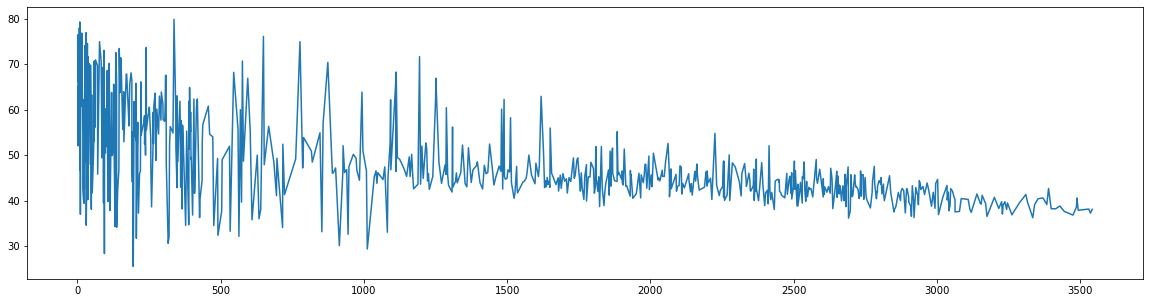

In [10]:
plt.subplots(figsize=(20,5))
plt.plot(df["elevation"], df["TAVG"])

In [11]:
df.to_csv("elevation_avgtemp.csv")

# Month vs. Precipitation

In [56]:
df = weather[["month", "PRCP", "month-num"]].dropna()
df = df.groupby("month").mean().reset_index()
df = df.sort_values('month-num')
df.head()

,month,PRCP,month-num
3,January,0.146761,1
2,February,0.149415,2
6,March,0.129484,3
0,April,0.131090,4
7,May,0.099035,5


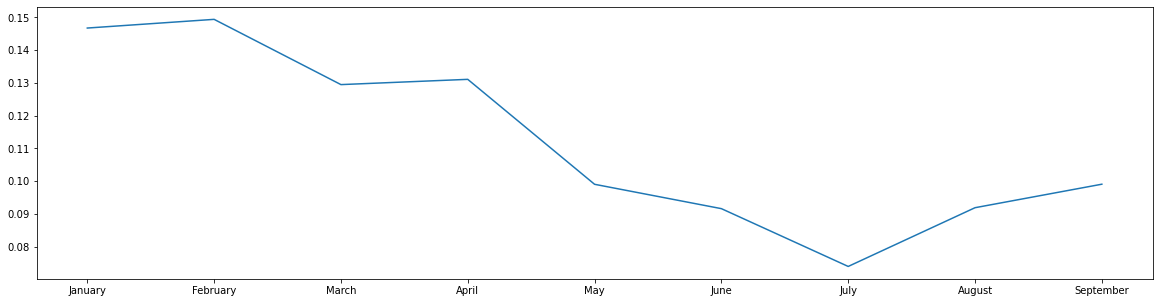

In [57]:
plt.subplots(figsize=(20,5))
plt.plot(df["month"], df["PRCP"])

In [58]:
df.to_csv("month_precip.csv")

# Average Temperature vs. State

In [15]:
df = weather[["TAVG", "state"]].dropna()
df = df.groupby("state").mean().reset_index()
df.head()

,state,TAVG
0,AB,43.131451
1,AK,35.649221
2,AL,68.883034
3,AR,64.612759
4,AZ,56.182558


<BarContainer object of 61 artists>

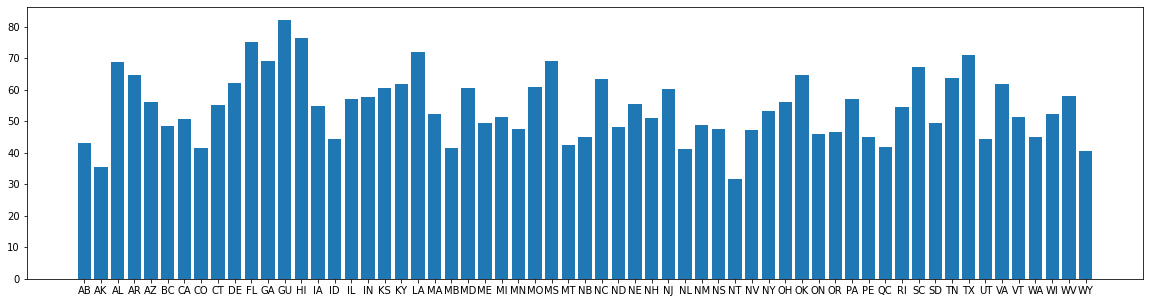

In [16]:
plt.subplots(figsize=(20,5))
plt.bar(df["state"], df["TAVG"])

In [17]:
df.to_csv("state_tavg.csv")

# Count of States

In [31]:
df = weather["state"].dropna()
df = df.value_counts().reset_index()
df = df.sort_values('index')
df.columns = ['state', 'count']
df.head()

,state,count
51,AB,528
8,AK,18627
33,AL,3908
30,AR,4162
15,AZ,6808


<BarContainer object of 64 artists>

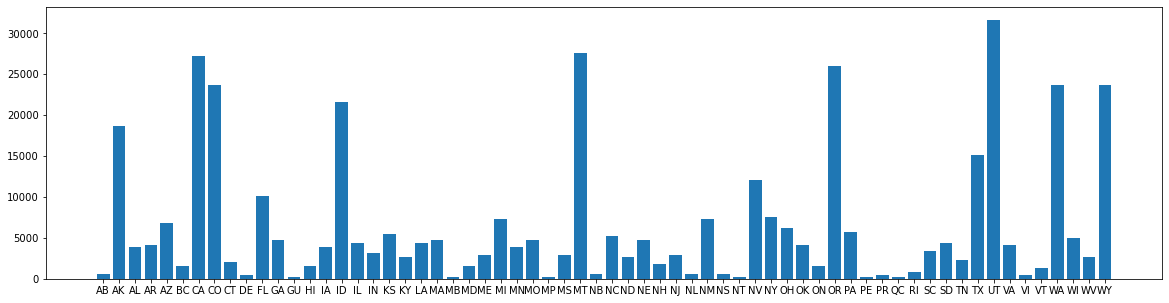

In [32]:
plt.subplots(figsize=(20,5))
plt.bar(df["state"], df["count"])

In [33]:
df.to_csv("state_count.csv")

# Wind Speed

In [44]:
df = weather[["AWND", "state", "TAVG"]].dropna()
df.head()

,AWND,state,TAVG
0,4.473880,GU,80.06
7,3.802798,MT,13.64
8,4.026492,MT,44.24
9,3.579104,MT,59.72
10,6.039738,MT,71.60


# Average Wind Speed vs. State

In [41]:
df = weather[["AWND", "state"]].dropna()
df = df.groupby("state").mean().reset_index()
df.head()

,state,AWND
0,AK,7.737317
1,AL,5.589994
2,AR,6.508412
3,AZ,7.331594
4,CA,6.889778


<BarContainer object of 54 artists>

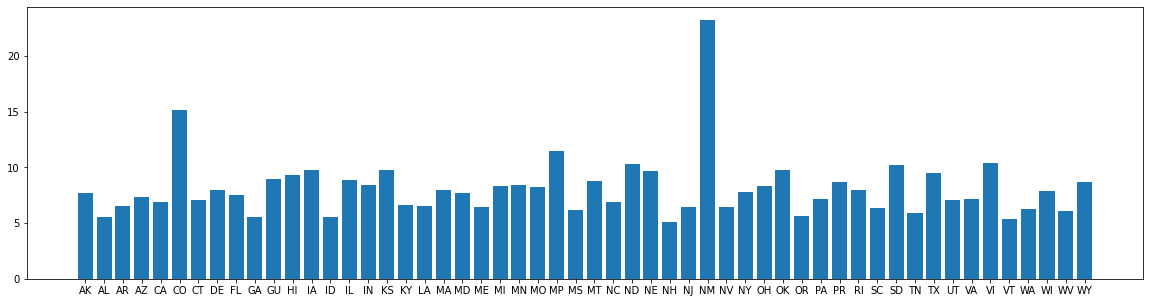

In [42]:
plt.subplots(figsize=(20,5))
plt.bar(df["state"], df["AWND"])

In [43]:
df.to_csv("windspeed_state.csv")

# Snowfall vs. Snow Depth vs. Month

In [59]:
df = weather[["SNOW", "SNWD", "month", "month-num"]].dropna()
df = df.groupby("month").mean().reset_index()
df = df.sort_values('month-num')
df.head()

,month,SNOW,SNWD,month-num
3,January,0.160239,1.695030,1
2,February,0.148118,1.666890,2
6,March,0.111422,1.094053,3
0,April,0.026601,0.343298,4
7,May,0.003531,0.017059,5


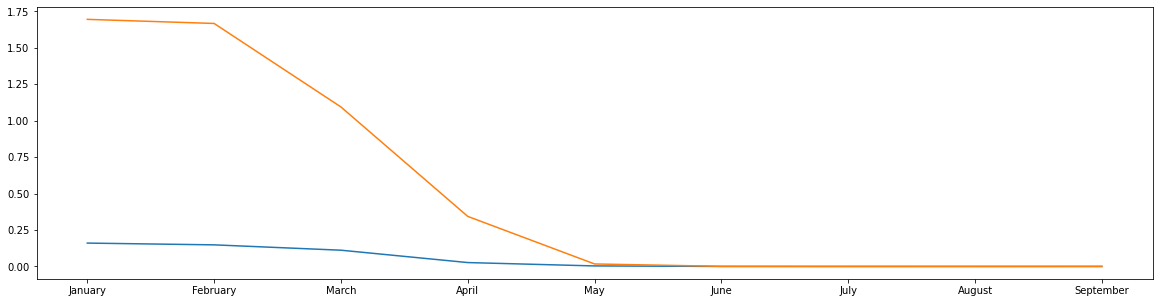

In [60]:
plt.subplots(figsize=(20,5))
plt.plot(df["month"], df["SNOW"])
plt.plot(df["month"], df["SNWD"])

In [61]:
df.to_csv("snow_snwd_month.csv")